In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel('C:/Users/USER/Downloads/myexcel.xlsx')

In [5]:
# Display the first 5 rows

df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [7]:
# Get Statistical summary

df.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [9]:
# Get the column and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [11]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [13]:
# Fill Missing Values in college column with 'Unknown'

df['College'].fillna('Unknown', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_15444\1928238645.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['College'].fillna('Unknown', inplace=True)


In [22]:
# Fill Missing values in Salary Column with Median

salary_median = df['Salary'].median()
print(salary_median)
df['Salary'].fillna(salary_median, inplace=True)

2836186.0


C:\Users\USER\AppData\Local\Temp\ipykernel_15444\752246594.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(salary_median, inplace=True)


In [30]:
# Verify Missing values are filled

print(df['Salary'].isnull().sum())
print(df['College'].isnull().sum())

0
0


In [53]:
#Check for duplicates

df.duplicated().sum()

0

In [34]:
# Replacing height column with random values

df['Height'] = np.random.randint(150,181, size=len(df))

In [38]:
# Verify the Changes

print(df['Height'].head())
print()
print(df['Height'].describe())

0    179
1    178
2    162
3    154
4    161
Name: Height, dtype: int32

count    458.000000
mean     165.436681
std        9.004577
min      150.000000
25%      158.000000
50%      165.000000
75%      173.000000
max      180.000000
Name: Height, dtype: float64


In [111]:
# 1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

team_dist = df['Team'].value_counts()

team_dist_perct = (team_dist/len(df))*100

team_stats = pd.DataFrame({'Employee Count':team_dist,
                           'Percentage':team_dist_perct})
print(team_stats)

                        Employee Count  Percentage
Team                                              
New Orleans Pelicans                19    4.148472
Memphis Grizzlies                   18    3.930131
Utah Jazz                           16    3.493450
New York Knicks                     16    3.493450
Milwaukee Bucks                     16    3.493450
Brooklyn Nets                       15    3.275109
Portland Trail Blazers              15    3.275109
Oklahoma City Thunder               15    3.275109
Denver Nuggets                      15    3.275109
Washington Wizards                  15    3.275109
Miami Heat                          15    3.275109
Charlotte Hornets                   15    3.275109
Atlanta Hawks                       15    3.275109
San Antonio Spurs                   15    3.275109
Houston Rockets                     15    3.275109
Boston Celtics                      15    3.275109
Indiana Pacers                      15    3.275109
Detroit Pistons                

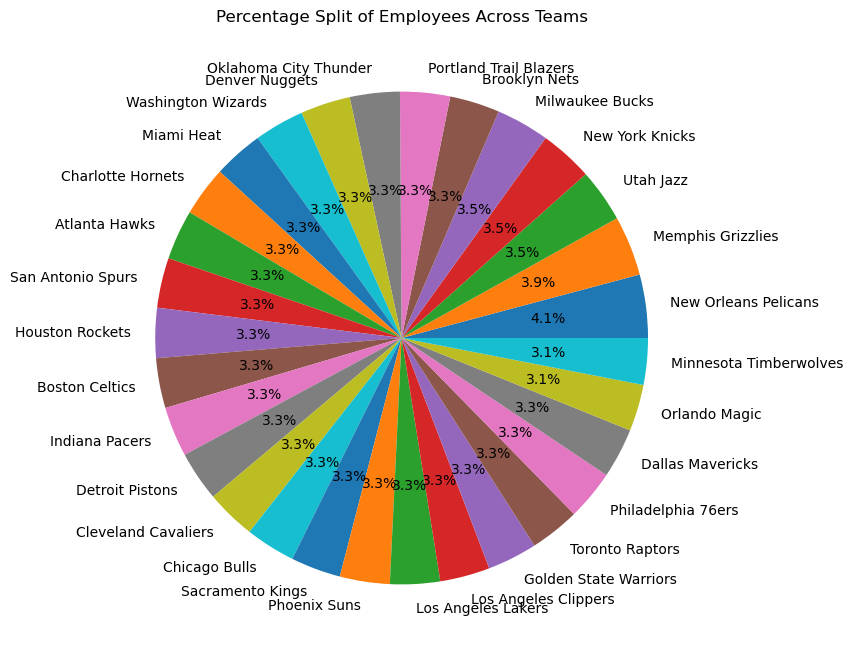

In [105]:
# Visualization

plt.figure(figsize=(8,8))
plt.pie(team_dist_perct, labels=team_dist.index, autopct='%1.1f%%')
plt.title('Percentage Split of Employees Across Teams')
plt.show()

In [175]:
# 2.Segregate employees based on their positions within the company.

position_dist = df['Position'].value_counts()

position_df = pd.DataFrame({'Position': position_dist.index, 'Count': position_dist.values})
print(position_df)

  Position  Count
0       SG    102
1       PF    100
2       PG     92
3       SF     85
4        C     79


Text(0.5, 1.0, 'Employee Distribution across Position')

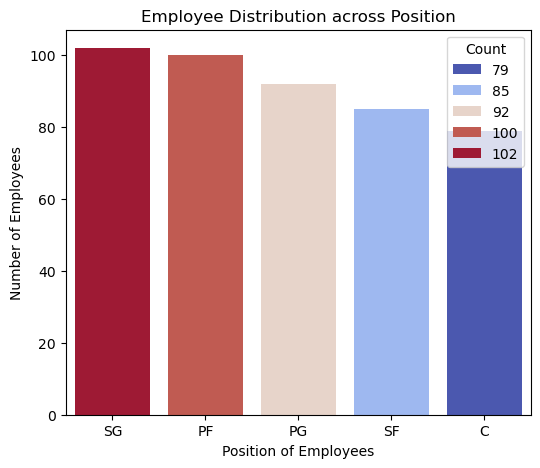

In [235]:
# Visualisation

plt.figure(figsize=(6,5))
sns.barplot(position_df,x='Position',y='Count',hue='Count', palette='coolwarm')
plt.xlabel('Position of Employees')
plt.ylabel('Number of Employees')
plt.title('Employee Distribution across Position')


In [206]:
# 3. Identify the predominant age group among employees.

bins = [18,25,35,45,55,65]
labels = ['18-25','26-35','36-45','46-55','56-65']

df['Age Group'] = pd.cut(df['Age'],bins=bins, labels=labels, right=True)
age_grp_disbn = df['Age Group'].value_counts()


df_age_grp_disbn = pd.DataFrame({'Age Group':age_grp_disbn.index, 'Count': age_grp_disbn.values})
print(age_grp_disbn)

Age Group
26-35    235
18-25    200
36-45     23
46-55      0
56-65      0
Name: count, dtype: int64


Text(0.5, 1.0, 'Age Distribution across Age Group')

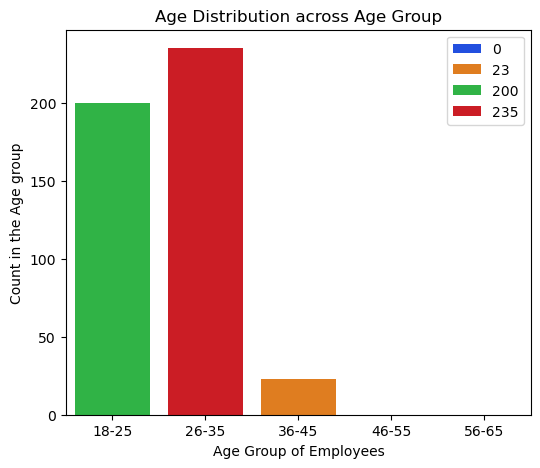

In [240]:
# Visualization for age across Age Group

plt.figure(figsize=(6,5))
sns.barplot(x = age_grp_disbn.index, y= age_grp_disbn.values, hue=age_grp_disbn.values, palette='bright')
plt.xlabel('Age Group of Employees')
plt.ylabel('Count in the Age group')
plt.title('Age Distribution across Age Group')


In [313]:
# 4. Discover which team and position have the highest salary expenditure.

# finding the Highest Salary Expenditure per Team

team_sal_expen = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)

#Display the top 5 teams
print(team_sal_expen.head())



Team
Cleveland Cavaliers      109824875.0
Los Angeles Clippers      94854640.0
Oklahoma City Thunder     93765298.0
Golden State Warriors     88868997.0
Miami Heat                88188045.0
Name: Salary, dtype: float64


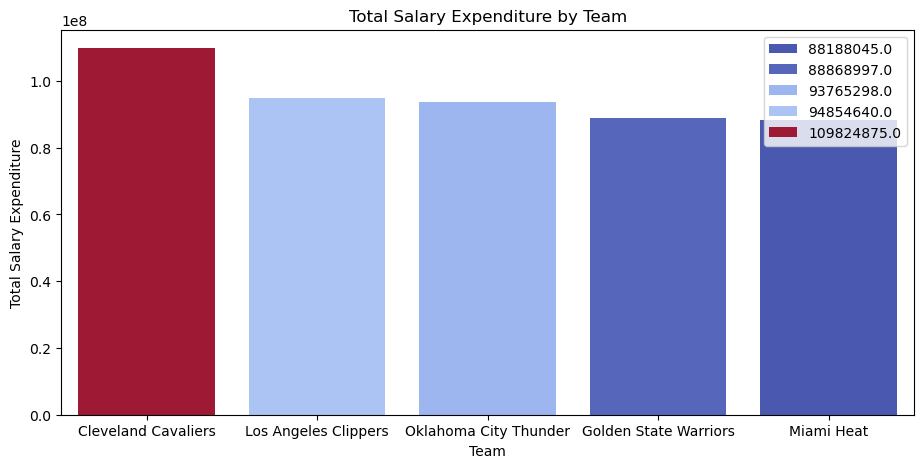

In [301]:
# Visualization for the Highest Salary Expenditure per Team

plt.figure(figsize=(11,5))
sns.barplot(x=team_sal_expen.head().index,y=team_sal_expen.head().values,hue=team_sal_expen.head().values, palette="coolwarm")
plt.xlabel("Team")
plt.ylabel("Total Salary Expenditure")
plt.title("Total Salary Expenditure by Team")
plt.show()

In [284]:
# finding the Salary Expenditure per Position

position_sal_expen = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

#Display the top 5 position
print(position_sal_expen.head())


Position
C     466377332.0
PG    458193715.0
PF    451069408.0
SF    410857162.0
SG    405484816.0
Name: Salary, dtype: float64


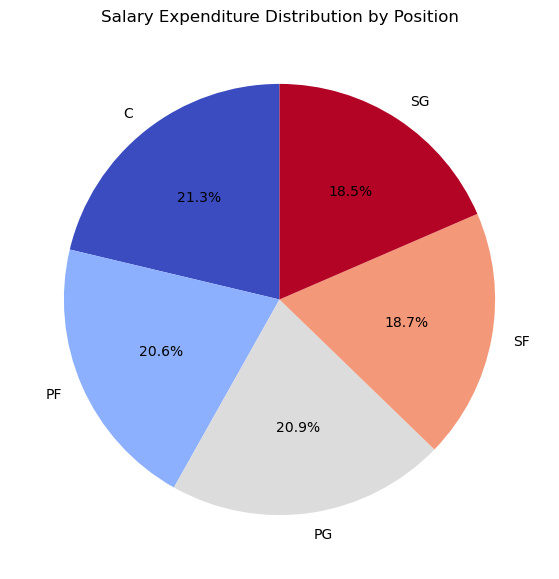

In [311]:
# Visualization for the Highest Salary Expenditure per Position


plt.figure(figsize=(10,7))
df.groupby("Position")["Salary"].sum().plot(kind="pie", autopct="%1.1f%%", cmap="coolwarm", startangle=90)
plt.title("Salary Expenditure Distribution by Position")
plt.ylabel("")  
plt.show()


In [317]:
#5. Investigate if there's any correlation between age and salary, and represent it visually. 


# Checking Correlation

correlation = df["Age"].corr(df["Salary"])
print(f"Correlation between Age and Salary: {correlation}")



Correlation between Age and Salary: 0.2091241911519606


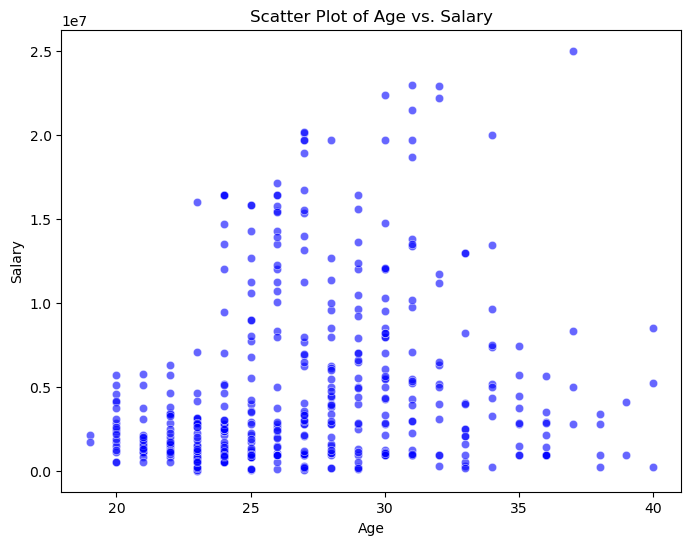

In [324]:
# Scatter Plot for visualizing relationship between age and Salary

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Age"], y=df["Salary"], color="blue", alpha=0.6)

plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Scatter Plot of Age vs. Salary")
plt.show()


# Insights from the Data Analysis

In [ ]:
#Salary Distribution Across Teams & Positions

 #Key Finding:

# 1.The highest salary expenditure is seen in the Cleveland Cavaliers and the C role.
# 2.Certain teams have a higher proportion of employees but contribute less to the overall salary expenditure, suggesting pay disparity across departments.
# 3.Senior-level roles have significantly higher salaries compared to entry-level roles.

#Actionable Insight: The company could evaluate salary structures to ensure fair compensation across teams.

#Correlation Between Age & Salary

Key Finding:

1.The correlation between Age and Salary is 0.20, which indicates a weak positive relationship.
2.While older employees generally earn more, age alone is not a strong factor in salary determination.
3.Other factors like experience, role, and education might have a stronger impact.

 Actionable Insight: The company could focus on performance-based pay rather than tenure-based increments.

#Employee Distribution by Age Group & Position

Key Finding:

1.The majority of employees fall within the 26-35 category.
2.Certain age groups dominate specific job roles, indicating possible career progression trends.
3.The presence of few senior employees in high-paying roles suggests limited upward mobility.

Actionable Insight: The company could introduce mentorship programs to prepare mid-level employees for leadership roles.

